<a href="https://colab.research.google.com/github/Abdullahkitchlew/Machine-Learning/blob/main/Fracture_Detection_using_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# !pip list

In [ ]:
import tensorflow as tf
import os



Importing Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow import keras
%matplotlib inline

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/', batch_size=100)


Found 8883 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()


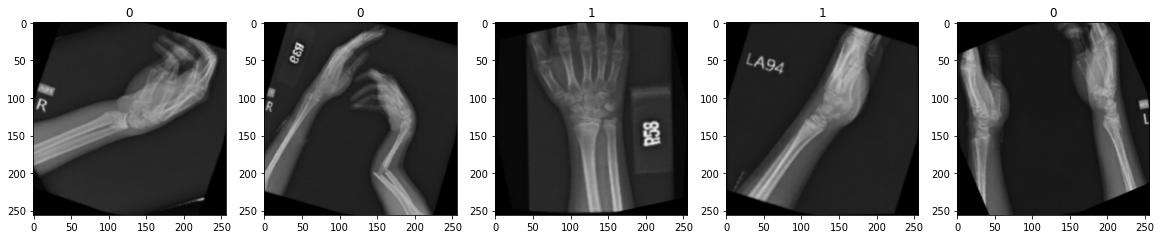

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))


for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
batch[0].shape

(100, 256, 256, 3)

In [ ]:
batch[1]


array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)

Scaling Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))



Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

Splitting Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

62

In [ ]:
test_size

8

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [ ]:
# tf.data.Dataset??

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
62/62 [==============================] - 45s 611ms/step - loss: 0.5985 - accuracy: 0.6668 - val_loss: 0.4907 - val_accuracy: 0.7700
Epoch 2/20
62/62 [==============================] - 59s 941ms/step - loss: 0.3440 - accuracy: 0.8524 - val_loss: 0.2517 - val_accuracy: 0.9059
Epoch 3/20
62/62 [==============================] - 38s 598ms/step - loss: 0.1508 - accuracy: 0.9434 - val_loss: 0.1630 - val_accuracy: 0.9418
Epoch 4/20
62/62 [==============================] - 59s 936ms/step - loss: 0.0560 - accuracy: 0.9815 - val_loss: 0.0905 - val_accuracy: 0.9724
Epoch 5/20
62/62 [==============================] - 39s 618ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 6/20
62/62 [==============================] - 39s 614ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0804 - val_accuracy: 0.9753
Epoch 7/20
62/62 [==============================] - 39s 615ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.0781 - val_accuracy: 0.9835

Plot Performance and Accuracy

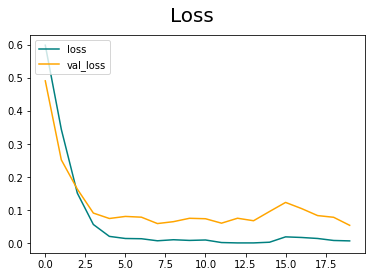

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

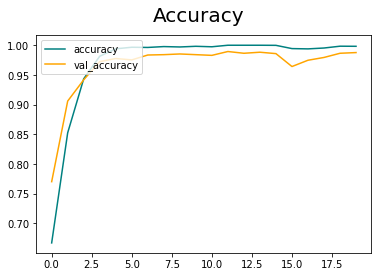

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

4/4 [==============================] - 0s 10ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9660194, shape=(), dtype=float32) tf.Tensor(0.982716, shape=(), dtype=float32) tf.Tensor(0.97375, shape=(), dtype=float32)


Test

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/val/', batch_size=100)

Found 600 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [ ]:
yhat = model.predict(data.as_numpy_iterator())

6/6 [==============================] - 1s 148ms/step


In [ ]:
yhat

array([[7.33058393e-01],
       [9.99812782e-01],
       [3.22775293e-07],
       [6.57550454e-01],
       [9.63279724e-01],
       [4.35503930e-01],
       [9.99987841e-01],
       [3.33915442e-01],
       [6.16875757e-03],
       [4.82606925e-02],
       [3.57920182e-13],
       [9.97836053e-01],
       [1.31256040e-16],
       [1.28107122e-03],
       [9.99989748e-01],
       [5.15245646e-03],
       [9.99592841e-01],
       [1.53752893e-01],
       [9.99997377e-01],
       [1.08282844e-11],
       [1.10112270e-03],
       [8.02610397e-01],
       [9.99975681e-01],
       [1.19374243e-04],
       [9.81708126e-06],
       [6.33907259e-01],
       [9.97078538e-01],
       [2.02307235e-02],
       [8.70142728e-02],
       [8.53808963e-18],
       [9.99514222e-01],
       [4.74263459e-01],
       [2.15489715e-01],
       [9.85087156e-01],
       [6.74120031e-07],
       [3.90182175e-02],
       [4.29620835e-12],
       [1.57992274e-03],
       [4.48674738e-01],
       [1.09860332e-04],


In [ ]:
print("Optimized CNN Model")

print( 'Model Accuracy:' +str(model.evaluate(data.as_numpy_iterator())[1]))
print( 'Model Loss:' +str(model.evaluate(data.as_numpy_iterator())[0]))

Optimized CNN Model
6/6 [==============================] - 1s 151ms/step - loss: 1.8971 - accuracy: 0.6667
Model Accuracy:0.6666666865348816
6/6 [==============================] - 1s 105ms/step - loss: 1.8971 - accuracy: 0.6667
Model Loss:1.897139072418213
